Data Preprocessing and Scaling

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
from imblearn.over_sampling import RandomOverSampler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pip install imbalanced-learn


In [ ]:
def handle_outliers(data, column):
    # Calculate quartiles and IQR
    Q1, Q3 = np.percentile(data[column], [25, 75])
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    # Return the filtered DataFrame
    return data_filtered

In [ ]:
# DATASET
data = pd.read_csv("/content/mock_fashion_data_uk_us.csv")
data

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,N9Q4,15.430975,Jigsaw,Footwear,Very Bad,3.967106,197,Streetwear,"S, M, L",M,Blue,Average,27,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,V2T6,81.116542,Alexander McQueen,Outerwear,Not Good,2.844659,473,Formal,"S, M, L",L,Red,Very High,50,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,S7Y1,31.633686,Tommy Hilfiger,Bottoms,Very Good,1.183242,55,Sporty,"M, L, XL",S,Green,Above Average,23,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,K9C7,16.255998,Mulberry,Accessories,Best,3.534252,312,Vintage,"S, L, XL",XL,Green,Very High,37,Cosmopolitan,Olivia Palermo,Winter,Holiday,Positive,Negative,Positive
999996,E5I5,78.555545,Mulberry,Activewear,Best,1.896160,68,Casual,"S, M, L",L,Red,Average,52,Glamour,Kendall Jenner,Spring,Evening,Unknown,Other,Neutral
999997,Y0C9,34.379639,Mulberry,Tops,Not Good,3.168064,237,Casual,"S, M, L",M,Red,High,25,Cosmopolitan,Leandra Medine,Summer,Evening,Neutral,Mixed,Unknown
999998,B1D8,62.343618,Ralph Lauren,Tops,Best,4.764673,53,Sporty,"M, L, XL",S,Red,Above Average,29,W,Olivia Palermo,Spring/Summer,Evening,Positive,Other,Other


In [ ]:
data.dtypes

Product Name                     object
Price                           float64
Brand                            object
Category                         object
Description                      object
Rating                          float64
Review Count                      int64
Style Attributes                 object
Total Sizes                      object
Available Sizes                  object
Color                            object
Purchase History                 object
Age                               int64
Fashion Magazines                object
Fashion Influencers              object
Season                           object
Time Period Highest Purchase     object
Customer Reviews                 object
Social Media Comments            object
feedback                         object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Product Name                  1000000 non-null  object 
 1   Price                         1000000 non-null  float64
 2   Brand                         1000000 non-null  object 
 3   Category                      1000000 non-null  object 
 4   Description                   1000000 non-null  object 
 5   Rating                        1000000 non-null  float64
 6   Review Count                  1000000 non-null  int64  
 7   Style Attributes              1000000 non-null  object 
 8   Total Sizes                   1000000 non-null  object 
 9   Available Sizes               1000000 non-null  object 
 10  Color                         1000000 non-null  object 
 11  Purchase History              1000000 non-null  object 
 12  Age                          

In [ ]:
data.shape

(1000000, 20)

In [ ]:
data.isnull().sum()

Product Name                    0
Price                           0
Brand                           0
Category                        0
Description                     0
Rating                          0
Review Count                    0
Style Attributes                0
Total Sizes                     0
Available Sizes                 0
Color                           0
Purchase History                0
Age                             0
Fashion Magazines               0
Fashion Influencers             0
Season                          0
Time Period Highest Purchase    0
Customer Reviews                0
Social Media Comments           0
feedback                        0
dtype: int64

In [ ]:
data.fillna(value=np.nan, inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# Remove any special characters
special_chars_regex = r'[^\w\s]'
data = data.replace(to_replace=special_chars_regex, value='', regex=True)


In [ ]:
# Convert all text to lowercase
data = data.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
data = data.apply(lambda x: x.apply(lambda y: ' '.join([word for word in str(y).split() if word not in stop_words])) if x.dtype == "object" else x)


In [ ]:
# Group by method for top products
top_products = data['Product Name'].value_counts().nlargest(50).index.tolist()

# DataFrame only for top products
data_top_products = data[data['Product Name'].isin(top_products)].reset_index(drop=True)


In [ ]:
# SELECT CATEGORICAL COLUMN
categorical_cols = ['Brand', 'Category', 'Style Attributes', 'Total Sizes', 'Available Sizes', 'Color',
                    'Purchase History', 'Fashion Magazines', 'Fashion Influencers', 'Season',
                    'Time Period Highest Purchase']

data_categorical = data_top_products[categorical_cols]

#ONE HOT ENCODING CATEGORICAL TO NUMERIC
data_encoded = pd.get_dummies(data_categorical)

# EXTRAC NUMERIC COLUMN
numerical_cols = ['Price', 'Rating', 'Review Count', 'Age']
data_numerical = data_top_products[numerical_cols]

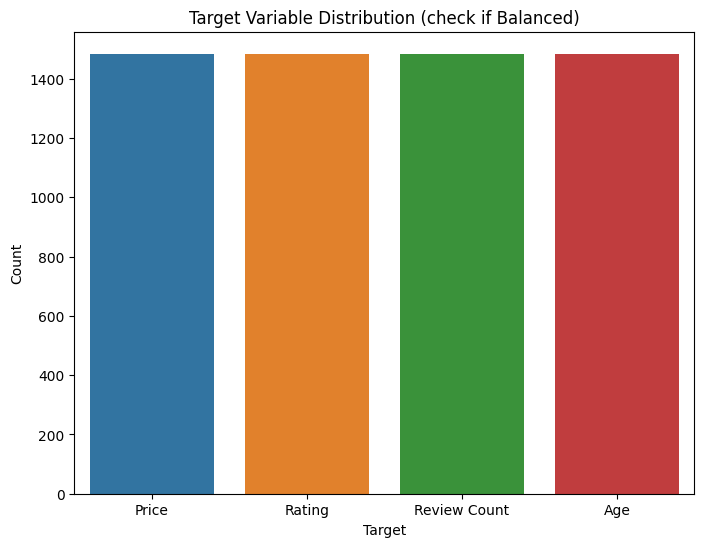

In [ ]:
# SELECT THE TARGET COLUMN
target_column = numerical_cols
target = data_top_products[target_column]

# Visualization of the target variable distribution check if balanced
plt.figure(figsize=(8, 6))
sns.countplot(target)
plt.title('Target Variable Distribution (check if Balanced)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [ ]:
# Convert columns to float using .loc
data_numerical.loc[:, 'Price'] = data_numerical.loc[:, 'Price'].astype(float)
data_numerical.loc[:, 'Rating'] = data_numerical.loc[:, 'Rating'].astype(float)
data_numerical.loc[:, 'Review Count'] = data_numerical.loc[:, 'Review Count'].astype(float)
data_numerical.loc[:, 'Age'] = data_numerical.loc[:, 'Age'].astype(float)


<ipython-input-19-83ed54c861b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numerical.loc[:, 'Price'] = data_numerical.loc[:, 'Price'].astype(float)
<ipython-input-19-83ed54c861b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numerical.loc[:, 'Rating'] = data_numerical.loc[:, 'Rating'].astype(float)
<ipython-input-19-83ed54c861b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [ ]:
# COMBINE THE CATEGORICAL FEATURE AND NUMERICAL FEATURE
data_preprocessed = pd.concat([data_encoded, data_numerical], axis=1)

# NORMALIZE AND SCALE AND STANDARIZE ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
numerical_cols = data_numerical.columns
data_preprocessed[numerical_cols] = scaler.fit_transform(data_numerical)

In [ ]:
scaler = StandardScaler()
data_preprocessed[numerical_cols] = scaler.fit_transform(data_preprocessed[numerical_cols])

Data training/testing and Model implimentation

In [ ]:
# SPLIT DATA TRAING AND TESTING SET
X = data_preprocessed.drop(['Price', 'Rating'], axis=1)
y_price = data_preprocessed['Price']
y_rating = data_preprocessed['Rating']

X_train, X_test, y_price_train, y_price_test, y_rating_train, y_rating_test = train_test_split(X, y_price, y_rating, test_size=0.2, random_state=42)


In [ ]:
# XGBOOST MODEL TO PRICE PREDICTION
price_model = XGBRegressor()
price_model.fit(X_train, y_price_train)

# XGBOOST MODEL TO RATING PREDICTION
rating_model = XGBRegressor()
rating_model.fit(X_train, y_rating_train)

# PREDICT ON THE TEST SET
y_price_pred = price_model.predict(X_test)
y_rating_pred = rating_model.predict(X_test)

In [ ]:
# DATARAME FOR THE PREDICTION VALUES
predictions_df = pd.DataFrame({'Product Name': data_top_products.iloc[X_test.index]['Product Name'],
                               'Original Price': data_top_products.iloc[X_test.index]['Price'],
                               'Original Rating': data_top_products.iloc[X_test.index]['Rating'],
                               'Predicted Price 2024': y_price_pred,
                               'Predicted Rating 2024': y_rating_pred})

# Output predictions in a tabular form
print(predictions_df.to_string(index=False))

Product Name  Original Price  Original Rating  Predicted Price 2024  Predicted Rating 2024
        j1a4       42.359944         3.862188              0.475553              -0.331401
        m9b8       36.684826         4.292800             -1.053046              -0.492390
        t2k6       92.073041         1.992619              0.461063               0.617715
        o0e5       82.263174         4.275312              0.803077               0.036690
        k7k4       87.627004         1.193716             -0.045773               0.595357
        d6f7       16.478533         1.739168              0.422817              -0.360595
        r9x4       72.701641         4.001196             -0.076488              -0.174765
        z8h4       75.848851         3.771986              1.189542               0.368807
        n3c7       92.447340         4.774131              0.194911              -1.147588
        l0g5       26.013261         1.563982              0.602613              -0.037849

In [ ]:
# EVALUATION PRICE PREDICTION
price_pred_train = price_model.predict(X_train)
price_pred_test = price_model.predict(X_test)

price_mae = mean_absolute_error(y_price_test, price_pred_test)
price_mse = mean_squared_error(y_price_test, price_pred_test)
price_rmse = np.sqrt(price_mse)


print("Price Prediction Evaluation:")
print("MAE: ", price_mae)
print("MSE: ", price_mse)
print("RMSE: ", price_rmse)

Price Prediction Evaluation:
MAE:  0.9280750719597592
MSE:  1.200476592711525
RMSE:  1.0956626272313594


In [ ]:
# EVALUATION RATING PREDICTION
rating_pred_train = rating_model.predict(X_train)
rating_pred_test = rating_model.predict(X_test)

rating_mae = mean_absolute_error(y_rating_test, rating_pred_test)
rating_mse = mean_squared_error(y_rating_test, rating_pred_test)
rating_rmse = np.sqrt(rating_mse)


print("Rating Prediction Evaluation:")
print("MAE: ", rating_mae)
print("MSE: ", rating_mse)
print("RMSE: ", rating_rmse)

Rating Prediction Evaluation:
MAE:  0.996917572236176
MSE:  1.3918781682931598
RMSE:  1.1797788641491929


In [ ]:
# RANDOM FOREST MODEL FOR PRICE PREDICTION
price_model2 = RandomForestRegressor()
price_model2.fit(X_train, y_price_train)

# RANDOM FOREST MODEL FOR RATING PREDICTION
rating_model2 = RandomForestRegressor()
rating_model2.fit(X_train, y_rating_train)


RandomForestRegressor()

In [ ]:
# PREDICTION FOR 2024
X_2024_2 = X  # Use all preprocessed dataset for prediction
price_2024_2 = price_model2.predict(X_2024_2)
rating_2024_2 = rating_model2.predict(X_2024_2)


In [ ]:
# DATAFRAME WITH THE PREDICTED VALUES FOR 2024
data_predictions_2024_2 = data_top_products[['Product Name']].copy()
data_predictions_2024_2['Predicted Price 2024'] = price_2024_2
data_predictions_2024_2['Predicted Rating 2024'] = rating_2024_2

In [ ]:
# FILTER THE PREDICTION FOR THE TOP PRODUCTS
data_top_product_predictions_2024_2 = data_predictions_2024_2[data_predictions_2024_2['Product Name'].isin(top_products)]

data_top_product_predictions_2024_2

,Product Name,Predicted Price 2024,Predicted Rating 2024
0,w1m1,0.348703,-0.818656
1,n3c7,0.510813,-0.162037
2,a9t9,0.558642,0.733992
3,k1g8,-0.474058,-0.501913
4,t5n2,1.158373,-0.659709
...,...,...,...
1479,s1a3,0.090969,0.003790
1480,i9h8,0.318292,0.238065
1481,s8f1,-0.625077,-0.136999
1482,k1g8,-0.572950,1.121427


In [ ]:
# Add a new column with a single value 'Brand'
data_top_product_predictions_2024_2['Brand'] = data['Brand']
data_top_product_predictions_2024_2['Original Price'] = data['Price']
data_top_product_predictions_2024_2['Original Rating'] = data['Rating']
# Display the DataFrame with the new column
data_top_product_predictions_2024_2


,Product Name,Predicted Price 2024,Predicted Rating 2024,Brand,Original Price,Original Rating
0,w1m1,0.348703,-0.818656,ralph lauren,97.509966,1.421706
1,n3c7,0.510813,-0.162037,ted baker,52.341277,1.037677
2,a9t9,0.558642,0.733992,jigsaw,15.430975,3.967106
3,k1g8,-0.474058,-0.501913,alexander mcqueen,81.116542,2.844659
4,t5n2,1.158373,-0.659709,tommy hilfiger,31.633686,1.183242
...,...,...,...,...,...,...
1479,s1a3,0.090969,0.003790,ralph lauren,85.365127,1.622556
1480,i9h8,0.318292,0.238065,ted baker,54.913764,1.385295
1481,s8f1,-0.625077,-0.136999,ted baker,49.651015,1.133901
1482,k1g8,-0.572950,1.121427,mulberry,55.387248,2.388793


In [ ]:
# Save DataFrame to CSV file
data_top_product_predictions_2024_2.to_csv('data_top_product_predictions_2024_2.csv', index=False)

In [ ]:
data2 = pd.read_csv('/content/data_top_product_predictions_2024_2.csv')
data2

,Product Name,Predicted Price 2024,Predicted Rating 2024,Brand,Original Price,Original Rating
0,w1m1,0.348703,-0.818656,ralph lauren,97.509966,1.421706
1,n3c7,0.510813,-0.162037,ted baker,52.341277,1.037677
2,a9t9,0.558642,0.733992,jigsaw,15.430975,3.967106
3,k1g8,-0.474058,-0.501913,alexander mcqueen,81.116542,2.844659
4,t5n2,1.158373,-0.659709,tommy hilfiger,31.633686,1.183242
...,...,...,...,...,...,...
1479,s1a3,0.090969,0.003790,ralph lauren,85.365127,1.622556
1480,i9h8,0.318292,0.238065,ted baker,54.913764,1.385295
1481,s8f1,-0.625077,-0.136999,ted baker,49.651015,1.133901
1482,k1g8,-0.572950,1.121427,mulberry,55.387248,2.388793


In [ ]:
# EVALUATION PRICE PREDICTION
price_pred_train = price_model2.predict(X_train)
price_pred_test = price_model2.predict(X_test)

price_mae2 = mean_absolute_error(y_price_test, price_pred_test)
price_mse2 = mean_squared_error(y_price_test, price_pred_test)
price_rmse2 = np.sqrt(price_mse2)

print("Price Prediction Evaluation:")
print("MAE: ", price_mae2)
print("MSE: ", price_mse2)
print("RMSE: ", price_rmse2)

Price Prediction Evaluation:
MAE:  0.8873607582717068
MSE:  1.0478231016863062
RMSE:  1.023632307855856


In [ ]:
# EVALUATION RATING PREDICTION
rating_pred_train = rating_model2.predict(X_train)
rating_pred_test = rating_model2.predict(X_test)

rating_mae2 = mean_absolute_error(y_rating_test, rating_pred_test)
rating_mse2 = mean_squared_error(y_rating_test, rating_pred_test)
rating_rmse2 = np.sqrt(rating_mse2)


print("Rating Prediction Evaluation:")
print("MAE: ", rating_mae2)
print("MSE: ", rating_mse2)
print("RMSE: ", rating_rmse2)

Rating Prediction Evaluation:
MAE:  0.889894418238915
MSE:  1.0544702702429478
RMSE:  1.026874028419722


In [ ]:
# SVM MODEL FOR PRICE PREDICTION
price_model = SVR()
price_model.fit(X_train, y_price_train)

# SVM MODEL FOR RATING PREDICTION
rating_model3 = SVR()
rating_model3.fit(X_train, y_rating_train)

# PREDICTION FOR 2024
X_2024 = X  # Use all preprocessed dataset for prediction
price_2024_3 = price_model.predict(X_2024)
rating_2024_3 = rating_model.predict(X_2024)

In [ ]:
# DATAFRAME WITH THE PREDICTED VALUES FOR 2024
data_predictions_2024 = data_top_products[['Product Name']].copy()
data_predictions_2024['Predicted Price 2024'] = price_2024_3
data_predictions_2024['Predicted Rating 2024'] = rating_2024_3

In [ ]:
# FILTER THE PREDICTION FOR THE TOP PRODUCTS
data_top_product_predictions_2024_3 = data_predictions_2024[data_predictions_2024['Product Name'].isin(top_products)]

print(data_top_product_predictions_2024_3)

     Product Name  Predicted Price 2024  Predicted Rating 2024
0            w1m1              0.334982              -1.221529
1            n3c7              0.297067              -0.178001
2            a9t9              0.593206               0.897823
3            k1g8             -0.592317              -0.743872
4            t5n2              0.287548              -1.089114
...           ...                   ...                    ...
1479         s1a3              0.132555              -0.046312
1480         i9h8              0.347098               0.402034
1481         s8f1             -0.199454              -0.255249
1482         k1g8             -0.615042               1.499085
1483         k4g6              0.817018              -1.213937

[1484 rows x 3 columns]


In [ ]:
# EVALUATION PRICE PREDICTION
price_pred_train = price_model.predict(X_train)
price_pred_test = price_model.predict(X_test)

price_mae3 = mean_absolute_error(y_price_test, price_pred_test)
price_mse3 = mean_squared_error(y_price_test, price_pred_test)
price_rmse3 = np.sqrt(price_mse)
print("Price Prediction Evaluation:")
print("MAE: ", price_mae3)
print("MSE: ", price_mse3)
print("RMSE: ", price_rmse3)

Price Prediction Evaluation:
MAE:  0.9185051284222729
MSE:  1.1406447420763848
RMSE:  1.0956626272313594


In [ ]:
# EVALUATION RATING PREDICTION
rating_pred_train = rating_model3.predict(X_train)
rating_pred_test = rating_model3.predict(X_test)

rating_mae3 = mean_absolute_error(y_rating_test, rating_pred_test)
rating_mse3 = mean_squared_error(y_rating_test, rating_pred_test)
rating_rmse3 = np.sqrt(rating_mse2)


print("Rating Prediction Evaluation:")
print("MAE: ", rating_mae3)
print("MSE: ", rating_mse3)
print("RMSE: ", rating_rmse3)

Rating Prediction Evaluation:
MAE:  0.9100281023341437
MSE:  1.1181381248226794
RMSE:  1.026874028419722


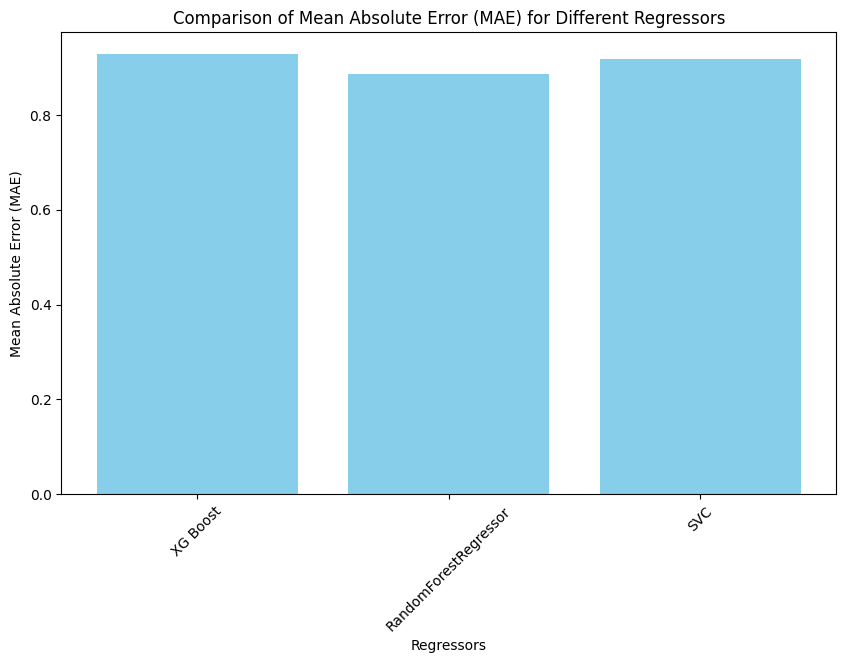

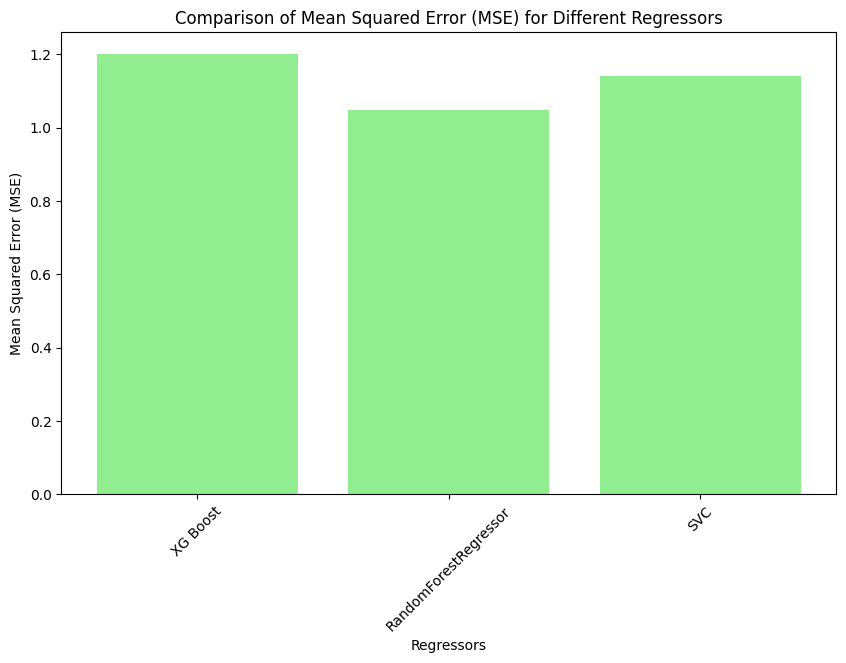

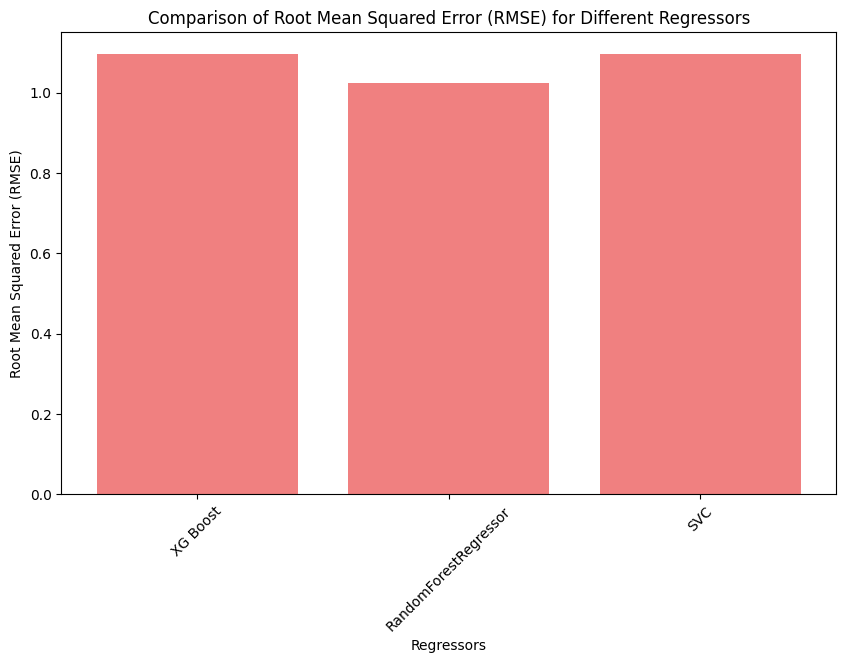

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have three lists containing the performance metrics for each regressor
# Example:
regressors = ['XG Boost', 'RandomForestRegressor', 'SVC']
mae_values = [price_mae, price_mae2, price_mae3]
mse_values = [price_mse, price_mse2, price_mse3]
rmse_values = [price_rmse, price_rmse2, price_rmse3]

# Plotting the bar chart for MAE
plt.figure(figsize=(10, 6))
plt.bar(regressors, mae_values, color='skyblue')
plt.xlabel('Regressors')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) for Different Regressors')
plt.xticks(rotation=45)
plt.show()

# Plotting the bar chart for MSE
plt.figure(figsize=(10, 6))
plt.bar(regressors, mse_values, color='lightgreen')
plt.xlabel('Regressors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Different Regressors')
plt.xticks(rotation=45)
plt.show()

# Plotting the bar chart for RMSE
plt.figure(figsize=(10, 6))
plt.bar(regressors, rmse_values, color='lightcoral')
plt.xlabel('Regressors')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of Root Mean Squared Error (RMSE) for Different Regressors')
plt.xticks(rotation=45)
plt.show()


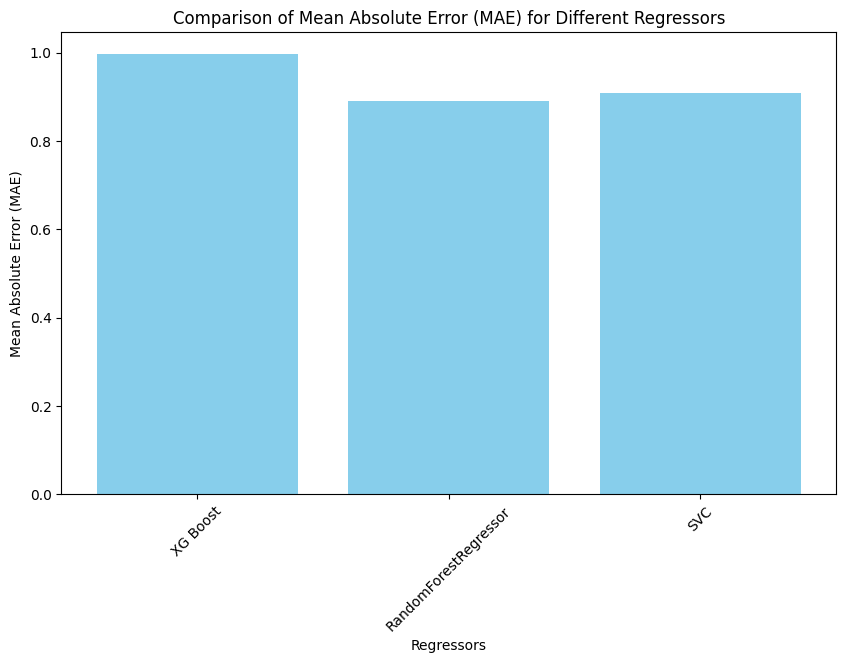

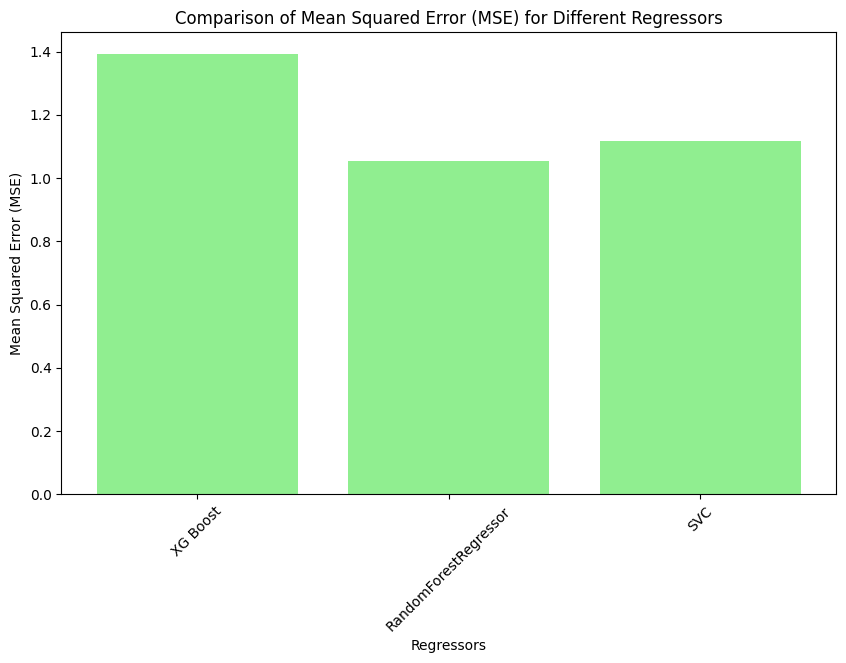

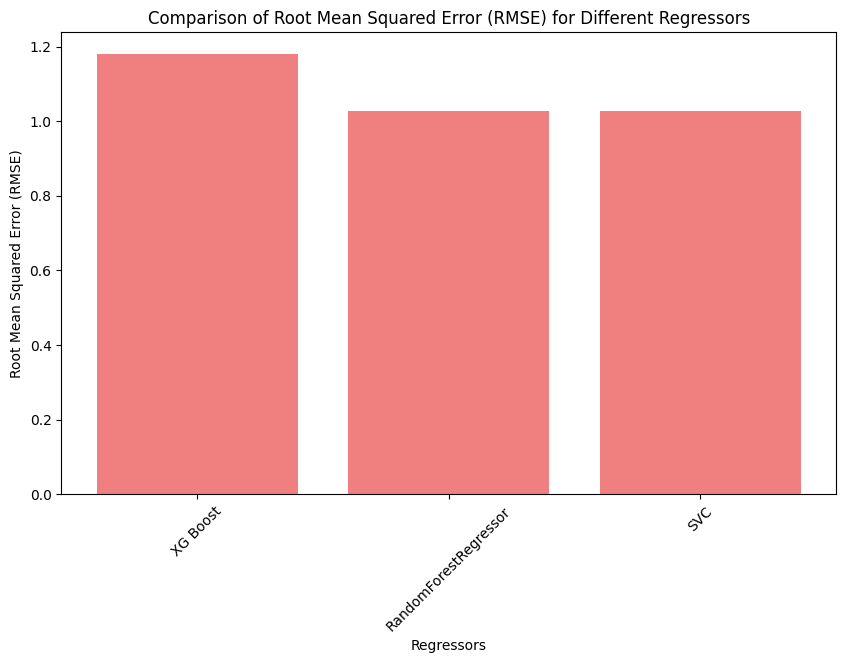

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have three lists containing the performance metrics for each regressor
# Example:
regressors = ['XG Boost', 'RandomForestRegressor', 'SVC']
mae_values = [rating_mae, rating_mae2, rating_mae3]
mse_values = [rating_mse, rating_mse2, rating_mse3]
rmse_values = [rating_rmse, rating_rmse2, rating_rmse3]

# Plotting the bar chart for MAE
plt.figure(figsize=(10, 6))
plt.bar(regressors, mae_values, color='skyblue')
plt.xlabel('Regressors')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) for Different Regressors')
plt.xticks(rotation=45)
plt.show()

# Plotting the bar chart for MSE
plt.figure(figsize=(10, 6))
plt.bar(regressors, mse_values, color='lightgreen')
plt.xlabel('Regressors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Different Regressors')
plt.xticks(rotation=45)
plt.show()

# Plotting the bar chart for RMSE
plt.figure(figsize=(10, 6))
plt.bar(regressors, rmse_values, color='lightcoral')
plt.xlabel('Regressors')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of Root Mean Squared Error (RMSE) for Different Regressors')
plt.xticks(rotation=45)
plt.show()
